**Comando para evitar mensagens de Warning**

In [24]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

**Caso não tenha instalado no seu Google Colab ou no seu Anaconda**

In [3]:
# caso você não tem essa biblioteca instalada use o comando abaixo.
!pip install imblearn

In [4]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
import seaborn as sns

Using TensorFlow backend.
C:\Users\Andre\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Andre\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Andre\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Andre\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

### **Modelo com classes desbalanceadas**

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
import pandas as pd

In [6]:
df = pd.read_csv('bank-full.csv', sep=';')

In [10]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,2.0,0,2143,1,0,1,5,5,261,1,-1,0,0,0
1,44,technician,single,1.0,0,29,1,0,1,5,5,151,1,-1,0,0,0
2,33,entrepreneur,married,1.0,0,2,1,1,1,5,5,76,1,-1,0,0,0
3,47,blue-collar,married,NaN,0,1506,1,0,1,5,5,92,1,-1,0,0,0
4,33,unknown,single,NaN,0,1,0,0,1,5,5,198,1,-1,0,0,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45211 non-null  int64  
 1   job        45211 non-null  object 
 2   marital    45211 non-null  object 
 3   education  43354 non-null  float64
 4   default    45211 non-null  int64  
 5   balance    45211 non-null  int64  
 6   housing    45211 non-null  int64  
 7   loan       45211 non-null  int64  
 8   contact    45211 non-null  int64  
 9   day        45211 non-null  int64  
 10  month      45211 non-null  int64  
 11  duration   45211 non-null  int64  
 12  campaign   45211 non-null  int64  
 13  pdays      45211 non-null  int64  
 14  previous   45211 non-null  int64  
 15  poutcome   45211 non-null  int64  
 16  y          45211 non-null  int64  
dtypes: float64(1), int64(14), object(2)
memory usage: 5.9+ MB


**Formatando algumas colunas**

In [9]:
df["default"] = df["default"].map({"no":0,"yes":1})
df["housing"] = df["housing"].map({"no":0,"yes":1})
df["loan"] = df["loan"].map({"no":0,"yes":1})
df["y"] = df["y"].map({"no":0,"yes":1})
df.education = df.education.map({"primary": 0, "secondary":1, "tertiary":2})
df.poutcome = df.poutcome.map({"unknown": 0, "failure":1, "other":2, "success":3})
df.contact = df.contact.map({"cellular": 0, "unknown":1, "telephone":2})
df.month = pd.to_datetime(df.month, format = "%b").dt.month

**Checando missing values**

In [15]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

**Removendo missing values**

In [13]:
df.dropna(inplace = True)

In [14]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,2.0,0,2143,1,0,1,5,5,261,1,-1,0,0,0
1,44,technician,single,1.0,0,29,1,0,1,5,5,151,1,-1,0,0,0
2,33,entrepreneur,married,1.0,0,2,1,1,1,5,5,76,1,-1,0,0,0
5,35,management,married,2.0,0,231,1,0,1,5,5,139,1,-1,0,0,0
6,28,management,single,2.0,0,447,1,1,1,5,5,217,1,-1,0,0,0


**Transformando colunas categóricas em numéricas**

In [16]:
df = pd.get_dummies(df)

In [17]:
df.head()

,age,education,default,balance,housing,loan,contact,day,month,duration,...,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single
0,58,2.0,0,2143,1,0,1,5,5,261,...,0,0,0,0,0,0,0,0,1,0
1,44,1.0,0,29,1,0,1,5,5,151,...,0,0,0,0,1,0,0,0,0,1
2,33,1.0,0,2,1,1,1,5,5,76,...,0,0,0,0,0,0,0,0,1,0
5,35,2.0,0,231,1,0,1,5,5,139,...,0,0,0,0,0,0,0,0,1,0
6,28,2.0,0,447,1,1,1,5,5,217,...,0,0,0,0,0,0,0,0,0,1


**Visualizando a distribuição das classes**

In [18]:
df.y.value_counts()

0    38317
1     5037
Name: y, dtype: int64

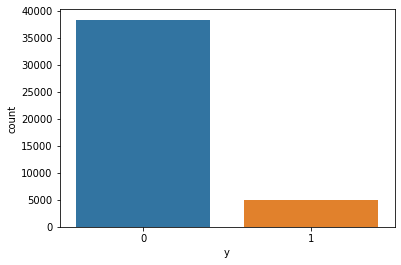

In [19]:
import seaborn as sns
ax = sns.countplot(x="y", data=df)

**Executando um Algoritmo Classificador**

In [20]:
lr = LogisticRegression()

**Separa dados e suas classes**

In [21]:
X = df.drop("y", axis = 1)#Quando não se usa inplace = true a execução não sera definitiva na memória.
y = df.y

**Separa dados de treino e teste**

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, stratify=y)#stratify, significa que ele vai aleatorizar os dados.

**Treina o algoritmo**

In [23]:
lr.fit(X_train, y_train)

C:\Users\Andre\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Coloca as classificações na variável y_pred**

In [25]:
y_pred = lr.predict(X_test)

**Checa a acurácia do modelo**

In [26]:
accuracy_score(y_test, y_pred)

0.8939016514438601

**Relatório de Classificação**

- *Observe o Recall*




In [27]:
print (classification_report(y_test, y_pred))# Modelo enviesado, pois aprendeu a classificação apenas da classe 0.

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      9580
           1       0.62      0.23      0.33      1259

    accuracy                           0.89     10839
   macro avg       0.76      0.61      0.64     10839
weighted avg       0.87      0.89      0.87     10839



**Matriz de confusão**

In [28]:
print (pd.crosstab(y_test, y_pred, rownames=['Real'], colnames=['Predito'], margins=True))

Predito      0    1    All
Real                      
0         9401  179   9580
1          971  288   1259
All      10372  467  10839


### **Aplicando NearMiss:**

*   Método de Undersampling.
*   Iguala as quantidade de amostras entre as classes.



In [0]:
from imblearn.under_sampling import NearMiss

**Instancia o NearMiss**

In [29]:
nr = NearMiss()# Reduz a classe majoritária. Ele mantem os exemplos com caracteriticas mais diferentes, portanto mantendo as suas caracteriticas.

**Aplica o NearMiss**



*   Aplica o NearMiss nos dados para igualar a quantidade de amostras das classes



In [30]:
X, y = nr.fit_sample(X, y)

**Checa a quantidade de amostras entre as classes**

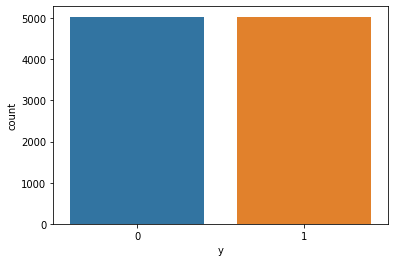

In [33]:
ax = sns.countplot(x=y)



*   Separa em 70% dos dados para treino e 30% para teste.




In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, stratify=y)

**Instância o classificador**

In [35]:
lr = LogisticRegression()

**Treina o algoritmo**

In [36]:
lr.fit(X_train, y_train)

C:\Users\Andre\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Coloca as classificações na variável y_pred**

In [37]:
y_pred = lr.predict(X_test)

**Checa a acurácia do modelo**

In [38]:
accuracy_score(y_test, y_pred)

0.8717745136959111

*Recall*

In [39]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1259
           1       0.89      0.85      0.87      1260

    accuracy                           0.87      2519
   macro avg       0.87      0.87      0.87      2519
weighted avg       0.87      0.87      0.87      2519



**Matriz de confusão**

In [40]:
print (pd.crosstab(y_test, y_pred, rownames=['Real'], colnames=['Predito'], margins=True))

Predito     0     1   All
Real                     
0        1128   131  1259
1         192  1068  1260
All      1320  1199  2519


### **Aplicando o SMOTE (Synthetic Minority Over-sampling Technique)**



*   Gera dados sintéticos da classe minoritária.



**Separa os dados e as classes**

*Aqui vamos repetir esse passo, pois, no teste do NearMiss a gente substituiu os dados das varíaveis X e y*

In [68]:
X = df.drop("y", axis = 1)
y = df.y

**Visualizando a quantidade de dados por classe**

In [56]:
np.bincount(y)

array([38317,  5037], dtype=int64)

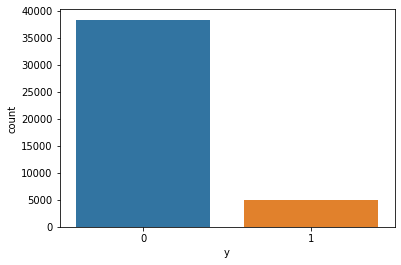

In [43]:
ax = sns.countplot(x=y)

**Instância o SMOTE**

In [69]:
# sampling_strategy=0.5 - Serve para aumentar a quatindade de ex da classe minoritária em relação a classe amioritaria, 
# portanto definir o limite de alteração da minoritária. Pois pode ocorrer overfitting com 100% dos dados novos.
smt = SMOTE(sampling_strategy=0.5)

**Aplica o SMOTE nos dados**

In [70]:
X, y = smt.fit_sample(X, y) # usa os vizinhos proximos para fazer a estimação dos dados sintéticos.

**Visualizando a distribuição das amostras**

In [71]:
np.bincount(y)

array([38317, 19158], dtype=int64)

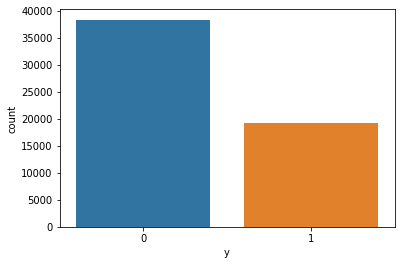

In [72]:
ax = sns.countplot(x=y)

**Separando Treino e Teste**



*   Separa em 70% dos dados para treino e 30% para teste.




In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, stratify=y)

**Instância o classificador**

In [74]:
lr = LogisticRegression()

**Treina o algoritmo**

In [75]:
lr.fit(X_train, y_train)

C:\Users\Andre\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Coloca as classificações na variável y_pred**

In [76]:
y_pred = lr.predict(X_test)

**Checa a acurácia do modelo**

In [77]:
accuracy_score(y_test, y_pred)

0.7807084696221032

*Recall*

In [78]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85      9579
           1       0.73      0.55      0.62      4790

    accuracy                           0.78     14369
   macro avg       0.76      0.72      0.73     14369
weighted avg       0.77      0.78      0.77     14369



**Matriz de Confusão**

In [79]:
print (pd.crosstab(y_test, y_pred, rownames=['Real'], colnames=['Predito'], margins=True))

Predito      0     1    All
Real                       
0         8598   981   9579
1         2170  2620   4790
All      10768  3601  14369
